In [1]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.8 MB/s eta 0:00:00


In [2]:
pip install numpy --use-deprecated=legacy-resolver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install NERDA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=e2e5ae869af1388a9bf8bb7d93e7b02f6835b968ca4e3f311eee8e73b7c97d9b
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=402505559222e15edb57bf9814c847d19877b459ffb52e4c19e176b8fa50fdc2
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built progressbar sklearn


In [4]:
#Load and make data
from google.colab import drive
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/')




Mounted at /content/drive/


In [5]:
file = open('36k_test.tsv')

data = []
s = []
l = []
t = []
for line in file:
    line = line.strip()
    if line:
        tks = line.split('\t')
        if len(tks)!=3:
            print("Data error at line,", line)
        else:
            s.append(tks[0])
            l.append(tks[1])
            t.append(tks[2])
    else:
        data.append((s,l,t))
        s = []
        l = []
        t = []

Data error at line, '	i
Data error at line, '	i
Data error at line, 'se	i


In [6]:
print(data[0])

(['Trường', 'ĐH', 'Giao', 'thông', 'vận', 'tải', 'vừa', 'công', 'bố', 'ngưỡng', 'điểm', 'nhận', 'đăng', 'ký', 'xét', 'tuyển', 'đầu', 'vào', '(', 'điểm', 'sàn', ')', 'đại', 'ho5c', 'hệ', 'chính', 'quy', 'theo', 'phương', 'thức', 'xét', 'tuyển', 'bvng', 'điểm', 'thi', 'tốt', 'nghiệp', 'THPT', 'năm', '2021'], ['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'i', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'i', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], ['Trường', 'ĐH', 'Giao', 'thông', 'vận', 'tải', 'vừa', 'công', 'bố', 'ngưỡng', 'điểm', 'nhận', 'đăng', 'ký', 'xét', 'tuyển', 'đầu', 'vào', '(', 'điểm', 'sàn', ')', 'đại', 'học', 'hệ', 'chính', 'quy', 'theo', 'phương', 'thức', 'xét', 'tuyển', 'bằng', 'điểm', 'thi', 'tốt', 'nghiệp', 'THPT', 'năm', '2021'])


In [7]:
#split train - valid - test set
# split by sentence length

#make length label for each sentence

length_label = [len(d[0]) for d in data]





In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, l_train, l_test = train_test_split(data, length_label, test_size = 0.2, random_state=17)

In [9]:
train_data[0]

(['Video', 'nưn', 'đột', 'ngột', 'khi', 'có', 'tiếng', 'súng', 'nổ'],
 ['c', 'i', 'c', 'c', 'c', 'c', 'c', 'c', 'c'],
 ['Video', 'ngưng', 'đột', 'ngột', 'khi', 'có', 'tiếng', 'súng', 'nổ'])

In [10]:
test_data, valid_data, l_test, lvalid =  train_test_split(test_data, l_test, test_size = 0.5, random_state=17)

In [11]:
#save train, test, valid data

import pickle

pickle.dump(train_data, open('spellcheck_train.pkl','wb'))
pickle.dump(test_data, open('spellcheck_test.pkl','wb'))
pickle.dump(valid_data, open('spellcheck_valid.pkl','wb'))

In [12]:
# make data for NERDA
train_sen = [d[0] for d in train_data]
train_label = [d[1] for d in train_data]
valid_sen = [d[0] for d in valid_data]
valid_label = [d[1] for d in valid_data]
test_sen = [d[0] for d in test_data]
test_label = [d[1] for d in test_data]

training_data = {'sentences':train_sen,'tags':train_label}
validation_data = {'sentences':valid_sen,'tags':valid_label}
test_data = {'sentences':test_sen,'tags':test_label}
del test_data['sentences'][2545] # delete item in index 2545
del test_data['tags'][2545]

In [13]:
num_token = 0
num_err = 0
for i in test_data['tags']:
  num_token += len(i)
  num_err += i.count('i')
print('num_token:', num_token) 
print('num_err:', num_err) 

num_token: 94701
num_err: 8529


In [14]:
print(training_data['sentences'][0])
print(training_data['tags'][0])

['Video', 'nưn', 'đột', 'ngột', 'khi', 'có', 'tiếng', 'súng', 'nổ']
['c', 'i', 'c', 'c', 'c', 'c', 'c', 'c', 'c']


In [15]:
index = 3662
print(len(test_data['sentences'][index]))
print(len(test_data['tags'][index]))
print(len(test_sen[3000]))
print(len(test_label[3000]))

37
37
9
9


In [16]:
# create NERDA model to train
from NERDA.models import NERDA
import torch

tag_scheme = ['i']
dropout = 0.1
# hyperparameters for training
training_hyperparameters = {
'epochs' : 10,
'warmup_steps' : 500,                                                   
'train_batch_size': 32,                                         
'learning_rate': 0.00002
}

print('number cuda = ', torch.cuda.device_count())
print('current cuda = ', torch.cuda.current_device())
torch.cuda.set_device(0)
print('current cuda = ', torch.cuda.current_device())
model1 = NERDA(
    dataset_training = training_data,
    dataset_validation = validation_data,
    tag_scheme = tag_scheme, 
    tag_outside = 'c',
    transformer = 'vinai/phobert-base',
    dropout = dropout,
    hyperparameters = training_hyperparameters,
    max_len=128,
    )

number cuda =  1
current cuda =  0
current cuda =  0
Device automatically set to: cuda


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [17]:
model1.load_network_from_file(model_path='spell_check_10epoch_max_leng_128_.bin')
# model1.train()
eval = model1.evaluate_performance(test_data, return_accuracy=True)
print(eval)
# model1.save_network('spell_check_10epoch_max_leng_128_.bin')

/usr/local/lib/python3.10/dist-packages/NERDA/models.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(f1_micro)
/usr/local/lib/python3.10/dist-packages/NERDA/models.py:401: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(f1_macro)


{'f1':        Level  F1-Score  Precision    Recall
0          i  0.973156   0.983825  0.962715
0  AVG_MICRO  0.973156        NaN       NaN
0  AVG_MICRO  0.973156        NaN       NaN, 'accuracy': 0.9952165235847562}


In [ ]:
eval.items()

dict_items([('f1',        Level  F1-Score  Precision    Recall
0          i  0.973156   0.983825  0.962715
0  AVG_MICRO  0.973156        NaN       NaN
0  AVG_MICRO  0.973156        NaN       NaN), ('accuracy', 0.9952165235847562)])

In [ ]:
print(test_data['sentences'][2545])
print(model1.predict([test_data['sentences'][2545]])[0])
print(test_data['tags'][2545])
print(len(test_data['sentences']))


['ộiá', 'hành', 'lá', 'tăng', 'gấp', 'bốn']
['i', 'c', 'c', 'c', 'c', 'c']
['i', 'c', 'c', 'c', 'c', 'c']
3663


[[86037   135]
 [  318  8211]]


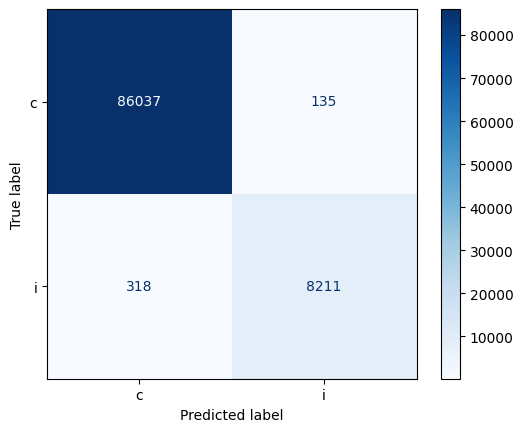

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

pred_labels = []
true_labels = []

for i in range(len(test_data['sentences'])):
  pred_labels.extend(model1.predict([test_data['sentences'][i]])[0])
  true_labels.extend(test_data['tags'][i])
conf_matrix = confusion_matrix(true_labels, pred_labels)
print(conf_matrix)
labels = ["c", "i"]
cm = conf_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
cm[1,1]
np.sum(cm[:,1])
np.sum(cm[1])

8529

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           c       1.00      1.00      1.00     86172
           i       0.98      0.96      0.97      8529

    accuracy                           1.00     94701
   macro avg       0.99      0.98      0.99     94701
weighted avg       1.00      1.00      1.00     94701



In [ ]:
def cm2pr_binary(cm):
    p = cm[1,1]/np.sum(cm[:,1])
    r = cm[1,1]/np.sum(cm[1])
    f1 = (2*p*r) / (p+r)
    return (p, r, f1)
p, r, f1 = cm2pr_binary(cm)
print("precition = {}, recall = {}, f1_score = {}".format(p, r, f1))

precition = 0.983824586628325, recall = 0.9627154414351038, f1_score = 0.9731555555555557


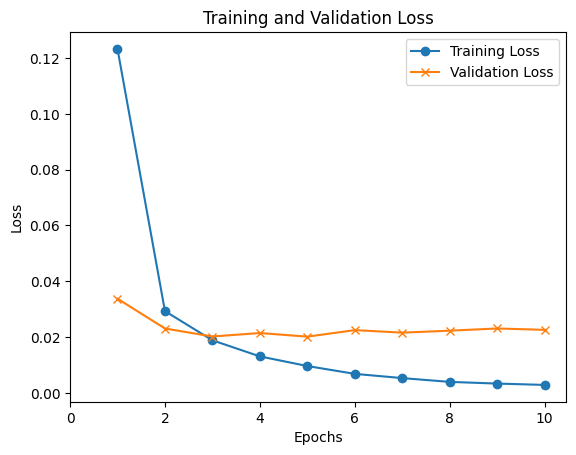

In [20]:
import pickle
from matplotlib.pylab import plt
from numpy import arange
# train_losses = model1.train_losses
'''
valid_losses = [0.033755363861995714, 0.023071850600428188, 0.02020325414066138,\
                0.02144780072669168, 0.02015166446002386, 0.0224915623592033,\
                0.021583714032491028, 0.022290236760343755, 0.023083277623359537,\
                0.022587714722467036]
'''
# Save the training and validation loss values

#pickle.dump(train_losses, open('train_loss.pkl','wb'))
#pickle.dump(valid_losses, open('val_loss.pkl','wb'))

# Load the training and validation loss dictionaries

train_loss = pickle.load(open('train_loss.pkl', 'rb'))
val_loss = pickle.load(open('val_loss.pkl', 'rb'))

train_values = train_loss
val_values = val_loss
 
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 11)
 
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss', marker='o')
plt.plot(epochs, val_values, label='Validation Loss', marker='x')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 11, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
sentence, label = model1.predict_text("xin chao các bạn")

In [33]:
model1.predict_text("tôi yêu việt lam")

([['tôi', 'yêu', 'việt', 'lam']], [['c', 'c', 'c', 'c']])

In [ ]:
model1.predict([test_sen[0]])[0]
test_sen[0]

['Chỉ',
 'áp',
 'dụng',
 'cho',
 'voucher',
 'mua',
 'và',
 'thanh',
 'toán',
 '100',
 '%',
 'tróng',
 'tháng',
 'synh',
 'nhật',
 'công',
 'tỹ',
 'từ',
 '1/12',
 'đến',
 '31/12']

In [ ]:
print(list(zip(model1.predict([test_sen[0]])[0], [test_sen[0]]))[0])

misspell = []
sen = test_sen[0]
label_pred = model1.predict([test_sen[0]])[0]
for i in range(len(label_pred)):
  misspell.append([sen[i], label_pred[i]])
misspell

('c', ['Chỉ', 'áp', 'dụng', 'cho', 'voucher', 'mua', 'và', 'thanh', 'toán', '100', '%', 'tróng', 'tháng', 'synh', 'nhật', 'công', 'tỹ', 'từ', '1/12', 'đến', '31/12'])


[['Chỉ', 'c'],
 ['áp', 'c'],
 ['dụng', 'c'],
 ['cho', 'c'],
 ['voucher', 'c'],
 ['mua', 'c'],
 ['và', 'c'],
 ['thanh', 'c'],
 ['toán', 'c'],
 ['100', 'c'],
 ['%', 'c'],
 ['tróng', 'i'],
 ['tháng', 'c'],
 ['synh', 'i'],
 ['nhật', 'c'],
 ['công', 'c'],
 ['tỹ', 'i'],
 ['từ', 'c'],
 ['1/12', 'c'],
 ['đến', 'c'],
 ['31/12', 'c']]

# Correction

In [ ]:
# path = "E:\\Khóa luận\\Spell_Check_Program\\data\\train_data\\"
# path = "C:\\Users\\thaib\\Downloads\\Khóa luận\\data\\"
path = "/content/drive/MyDrive/Colab Notebooks/"
file = open(path + "unigrams.pickle","rb")
unigrams = pickle.load(file)
file.close()
file = open(path + "bigrams.pickle","rb")
bigrams = pickle.load(file)
file.close()
word_counts = [unigrams, bigrams]

In [ ]:
def input_vocab(path_vocab):
    vocab = dict()
    arr = []
    loop = 0
    with open(path_vocab, encoding="utf8") as f:
        for line in f:
            line = line.replace("\n", "")
            #print(line)
            if tuple(line.split()) in vocab:
                vocab[tuple(line.split())] += 1
            else:
                vocab[tuple(line.split())] = 1
    return vocab

vocab = input_vocab('/content/drive/MyDrive/Colab Notebooks/TuDienTV74K.txt')

In [ ]:
def add_one_smoothing(ngram, counts):
    ngram = tuple(ngram)
    if len(ngram) == 1:
        unigrams = counts[0]
        N = sum(unigrams.values())
        V = len(unigrams)
        if ngram in unigrams:
            probability = float(unigrams[ngram]+1) / float(N+V)
        else:
            probability = 1 / float(N+V)
    elif len(ngram) == 2:
        unigrams = counts[0]
        bigrams = counts[1]
        V = len(unigrams)
        if ngram in bigrams:
            probability = float(bigrams[ngram]+1) / float(unigrams[ngram[0],]+V)
        else:
            #if [ngram[0],] in unigrams:
            if ngram[0:1] in unigrams:
                probability = 1 / float(unigrams[ngram[0],]+V)
            else:
                probability = 1/float(V)
    else:
        unigrams = counts[0]
        bigrams = counts[1]
        trigrams = counts[2]
        V = len(unigrams)
        if ngram in trigrams:
            probability = (trigrams[ngram]+1) / float(bigrams[ngram[0:2]]+V)
        else:
            if ngram[0:2] in trigrams:
                probability = 1 / float(bigrams[ngram[0:2]] + V)
            else:
                probability = 1 / float(V)
    return probability
    

In [ ]:
from nltk.metrics.distance import edit_distance
# Edit distance returns the number of changes to transform one word to another
print(edit_distance("yêu", "yeu"))

1


In [ ]:
def get_word_candidates(err_word, counts, vocab):
    unigrams = counts[0]
    #err_word = get_most_equivalent(err_word)
    unique_words = []
    s = []

    for i in vocab:
        unique_word = str(i[0])
        unique_words.append(unique_word)
        ed = edit_distance(err_word, unique_word)
        s.append(ed)
    distance = dict(zip(unique_words, s))
    dist_sorted = dict(sorted(distance.items(), key=lambda x:x[1]))
    #min_dist = list(dist_sorted.values())
    min_dist = set(dist_sorted.values())
 
    # print(min_dist)
    #keys_min = list(filter(lambda k: dist_sorted[k] == min_dist[0], dist_sorted.keys()))
    
    keys_min = []
    
    # if 4 in min_dist:
    #    keys_min.extend(list(filter(lambda k: dist_sorted[k] == 4, dist_sorted.keys())))
    if 0 in min_dist:
        keys_min.extend(list(filter(lambda k: dist_sorted[k] == 0, dist_sorted.keys())))
    if 1 in min_dist:
        keys_min.extend(list(filter(lambda k: dist_sorted[k] == 1, dist_sorted.keys())))
    if 2 in min_dist:
        keys_min.extend(list(filter(lambda k: dist_sorted[k] == 2, dist_sorted.keys())))
    if 3 in min_dist:
        keys_min.extend(list(filter(lambda k: dist_sorted[k] == 3, dist_sorted.keys())))
    
    return keys_min


In [ ]:
def lcs(X, Y, m, n):
    if m == 0 or n == 0:
        return 0
    elif X[m-1] == Y[n-1]:
        return 1 + lcs(X, Y, m-1, n-1)
    else:
        return max(lcs(X, Y, m, n-1), lcs(X, Y, m-1, n))
print(lcs("cat", "dog", len("cat"), len("dog")))
edit_distance("cat", "dog")

0


3

In [ ]:
import math
def vnspell_Corrector_suggestions(sentence, word_counts, vocabulary, threshold = 10, num_suggestions = 5):
    unigrams = word_counts[0]
    bigrams = word_counts[1]

    misspell = []
    sen = sentence[0]
    label_pred = model1.predict([sentence[0]])[0]
    for i in range(len(label_pred)):
      misspell.append([sen[i], label_pred[i]])

    check_misspell = misspell
    #print(check_misspell)
    detected_misspell = []
    idx = 0
    for item in check_misspell:
        if item[1] == 'i':
            detected_misspell.append([item[0], idx])
        else:
            detected_misspell.append([item[0], 'c'])
        idx += 1
    #print(detected_misspell)
    corrected = []
    for i in range(len(detected_misspell)):
        item = detected_misspell[i]
        #print(item)
        if item[1] == 'c':
            corrected.append(item)
        else:
            candidates = get_word_candidates(item[0], word_counts, vocabulary)[0:55] # edit distance
            #print(candidates)
            
            err_and_sug = dict(zip((item), [candidates]))
            #print(err_and_sug)
            """
            recommended_front = dict()
            recommended_back = dict()
            for suggestion in err_and_sug[item[0]]:
                if i == 0:
                    recommended_back[suggestion] = add_one_smoothing((suggestion, detected_misspell[i+1][0].lower()), word_counts)
                elif i == len(detected_misspell)-1:
                    recommended_front[suggestion] = add_one_smoothing((detected_misspell[i-1][0].lower(), suggestion), word_counts)
                else:
                    recommended_front[suggestion] = add_one_smoothing((detected_misspell[i-1][0].lower(), suggestion), word_counts)
                    recommended_back[suggestion] = add_one_smoothing((suggestion, detected_misspell[i+1][0].lower()), word_counts)
                    
            recommended_front_sorted = list(sorted(recommended_front.items(), key=lambda x:x[1], reverse=True))
            recommended_back_sorted = list(sorted(recommended_back.items(), key=lambda x:x[1], reverse=True))
            
            recommended_front_word = [word[0] for word in recommended_front_sorted]
            recommended_back_word = [word[0] for word in recommended_back_sorted] 
            #print(recommended_front_sorted)
            #print(recommended_back_sorted)
            #print(recommended_front_word[0:3])
            #print(recommended_back_word[0:3])
            """
            #combine = set(recommended_front_word + recommended_back_word)
            #print(combine)
            
            
            max = 0
            for w in candidates:
                lcs_value = lcs(item[0], w, len(item[0]), len(w))
                if lcs_value > max:
                    max = lcs_value
            #print(max)
            longest = [max-1, max]
            
            best_choice = []
            #for word in combine:
            for word in candidates:
                lcs_value_new = lcs(item[0], word, len(item[0]), len(word))
                if i == 0:
                    next = add_one_smoothing((word, detected_misspell[i+1][0].lower()), word_counts)
                    if (-math.log(next) < threshold\
                        or (word, detected_misspell[i+1][0].lower()) in vocab) and lcs_value_new in longest:
                        best_choice.append(tuple([word, next]))
                elif i == len(detected_misspell)-1:
                    prev = add_one_smoothing((detected_misspell[i-1][0].lower(), word), word_counts)
                    if (-math.log(prev) < threshold\
                        or (detected_misspell[i-1][0].lower(), word) in vocab) and lcs_value_new in longest:
                        best_choice.append(tuple([word, prev]))
                else:
                    prev = (add_one_smoothing((detected_misspell[i-1][0].lower(), word), word_counts))
                    next = (add_one_smoothing((word, detected_misspell[i+1][0].lower()), word_counts))
                    if (-math.log(prev) < threshold or -math.log(next) < threshold\
                        or (detected_misspell[i-1][0].lower(), word) in vocab\
                        or (word, detected_misspell[i+1][0].lower()) in vocab) and lcs_value_new in longest:
                        if prev > next:
                            best_choice.append(tuple([word, prev]))
                        else:
                            best_choice.append(tuple([word, next]))
                        
            #print(best_choice)
            best_choice.sort(key = lambda x: x[1], reverse=True)
            suggestions = [item[0] for item in best_choice][0:num_suggestions]
            #print(suggestions)
            # item.extend(suggestions)
            #corrected.append([item, suggestions])
            corrected.append([item, suggestions])
                    
            
    #print(check_misspell)
    #print(detected_misspell)
    return corrected
    

In [ ]:
vnspell_Corrector_suggestions([test_sen[11]], word_counts, vocab, threshold = 10, num_suggestions = 5)

[['vietravel', 'c'],
 ['báo', 'c'],
 ['lãi', 'c'],
 ['trở', 'c'],
 [['lai', 4], ['lại', 'lui']]]